# Thinkful Data Science Event:
## Unsupervised Learning- Customer Segmentation

Lately, we have been working on the dataset provided by a Portugese banking institution that was uploaded to the UCI Machine Learning Repository. In order to revisit this topic, feel free to go back over the previous [topics](https://github.com/zxs107020/Thinkful).

In this workshop, we will take our analysis a few steps furthers. We are going to delve into the topic of unsupervised learning. Basically, this is a component of data science in which we are not trying to classify things. Our analysis will instead focus on spotting trends and relationships within the data that are not easily captured by class labels. 

This component of data science has numerous applications. For example, in our dataset- we will use clustering techniques to identify unique groups of customers. This information could then be used to carry out targeted marketing campaigns for each of segment, with the goal of increasing our overall conversion rate for "term deposits".

## Getting Started-

As usual, we will begin by importing our data and transforming its contents into a format that we can use for the purpose of analysis. 

To do this, we will rely on the `ml` package that I have created. If you haven't already done so- be sure to download the script and copy it into your working directory so that you can utilize the functions as you follow along. 

In [1]:
# Import the required libraries
import ml
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the parameters
wd = '/path/to/files'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
fn = 'bank-additional.zip'
path = 'staging/bank-additional'
header = 0
sep = ';'
target = 'bank-additional-full'

In [3]:
# Load the data
data = ml.dat_imp(wd, url, fn, path, header, sep, target)

In [4]:
# Select object columns
cols = data.columns[data.dtypes.eq('object')]

In [5]:
# Convert to categories
for col in cols:
    data[col] = data[col].astype('category')

In [6]:
# Initialize label encoder
le = LabelEncoder()

# Encode categories numerically
for col in cols:
    data[col] = le.fit_transform(data[col])

### Visualization:

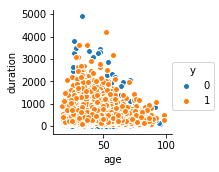

In [7]:
# Plot
sns.pairplot(x_vars = ['age'], y_vars = ['duration'], data = data, hue = 'y')

An important part of working through any given dataset is visualizing its content to create an image representation and also to help tell the story. Unfortunately in this case, the data is not that insightful because there are not strong relationships between the variables. Thats OK though, remember- this is actually the reason why we decided to use a Logistic Regression in our previous workshop. 

In any case, lets get to the fun stuff.

## Machine Learning-

In [8]:
# Split the data into training, validation, and testing sets using `ml`
x_train, x_val, x_test, y_train, y_val, y_test = ml.separate(data, 'y', .3)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Initialize the scaler
s = StandardScaler()
s.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# Transform the data
x_train_scaled = s.transform(x_train)
x_val_scaled = s.transform(x_val)
x_test_scaled = s.transform(x_test)

The last few steps in lines 9 & 10 are particularly important to take note of. 

Some algorithms, such as the ones we will be using today, need to be pre-processed through scaling in order to truly capture the information.

#### KNN:

The first thing we are going to do now is KNN. This stands for K-Nearest Neighbors. KNN is an algorithm that can be used for classification and regression. The premise is that the "distance" between data points can be calculated. This calculation can take many forms. For example, one of the most common measures is "Euclidean distance" which is an algebraic method. 

The KNN algorithm computes the distances between points and then creates clusters. For each cluster, all of the points contained within are closer to the center than they are to the center of any other cluster. One drawback of this method though is the fact that the number of centers must be defined in advance by the user. 

Intuitively, it would seem like we could use 2 for the number of clusters because this is the number of categories we have in our target variable. However, that is not always the case. To be sure, we will setup a mechanism to iterate through different values of N and record the error rates. This way, we can be sure that we have chosen the right number of clusters.

In [12]:
# Define the library
lib = 'from sklearn.neighbors import KNeighborsClassifier'

In [13]:
# Initialize a list to store results
error = []

In [14]:
# Iterate through the K values
for i in range(1, 10):
    string = ''.join(['KNeighborsClassifier(n_neighbors =', str(i), ')'])
    
    preds_i, conf_mat, class_rep, acc = ml.machine_learning(lib, x_train_scaled, y_train, x_val_scaled, y_val, string)
    
    error.append(np.mean(preds_i != y_val))

Now, lets take a look at our error rates to determine the optimal number of clusters:

Text(0,0.5,'Error')

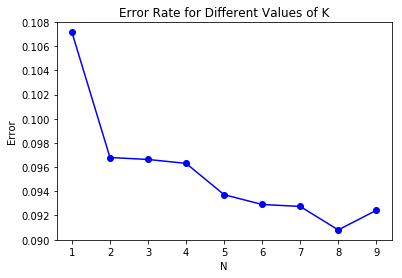

In [15]:
# Plot the errors
plt.plot(range(1, 10), error, color = 'blue', marker = 'o', markerfacecolor = 'blue')
plt.title('Error Rate for Different Values of K')
plt.xlabel('N')
plt.ylabel('Error')

From this, it is very obvious that the ideal number of clusters is 8. Essentially, what this means is: our banking customers can classified into 8 different categories which help define them as subscribers of the "term deposit". 

However, this method still falls under the banner of supervised learning. In the end, we have still created these eight different groups in order to help predict a value of 0 or 1 for `y` (our target variable). 

Using this information though, we can delve further into the realm of unsupervised learning. This will involve using our next algorithm.

#### K-Means:

The underlying concept behind this methodology is the same as the theory behind KNN. We use a distance metric and a predefined number of clusters in order to label groups of data. The only difference is that this information is not being used to predict anything. It is more of an illustrative procedure. However, there is useful information that results from this process. For example, we can label customers with group assignments and then use this information to conduct a targeted marketing campaign encouraging more customers to sign-up for "term deposits".

In [16]:
# K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8)

In [17]:
# Re-scale the entire dataset
s.fit(data.loc[:, data.columns != 'y'])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# Transform
data_scaled = s.transform(data.loc[:, data.columns != 'y'])

In [19]:
# Run the algorithm
kmeans = kmeans.fit(data_scaled)

Now that we have run the K-Means algorithm. We can label our customers with its output. This will simply indicate group membership which we can later use to formulate targeted strategies.

In [20]:
# Grab the labels
clusters = kmeans.predict(data_scaled)

In [21]:
# Assign values
data['cluster'] = clusters

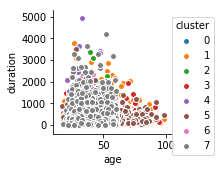

In [22]:
# Visualize
sns.pairplot(x_vars = ['age'], y_vars = ['duration'], data = pd.DataFrame(data), hue = 'cluster')

In [23]:
# Summarize term deposits by cluster
data.groupby('cluster')['y'].count()

cluster
0    1025
1    8601
2    6019
3    4109
4    6292
5    1514
6    4604
7    9024
Name: y, dtype: int64

In [26]:
data.groupby('cluster')['age', 'job', 'loan', 'duration'].describe()


age                                                         job  \
          count       mean        std   min   25%   50%   75%   max   count   
cluster                                                                       
0        1025.0  40.615610   9.557727  20.0  33.0  39.0  48.0  72.0  1025.0   
1        8601.0  39.275666  12.209563  18.0  31.0  36.0  45.0  98.0  8601.0   
2        6019.0  43.737830   9.014134  19.0  37.0  44.0  51.0  73.0  6019.0   
3        4109.0  39.929180  11.441954  17.0  32.0  37.0  46.0  94.0  4109.0   
4        6292.0  38.262238   9.222943  20.0  31.0  36.0  45.0  60.0  6292.0   
5        1514.0  41.860634  15.298130  17.0  30.0  37.0  52.0  98.0  1514.0   
6        4604.0  40.509340   8.853217  23.0  33.0  38.0  48.0  60.0  4604.0   
7        9024.0  38.909020   8.779329  18.0  32.0  37.0  45.0  61.0  9024.0   

                    ...   loan      duration                               \
             mean   ...    75%  max    count        mean         std  min   
cluster             ...                                                     
0        3.448780   ...    0.0  2.0   1025.0  157.335610  221.934377  4.0   
1        3.692710   ...    0.0  2.0   8601.0  268.543425  259.136239  0.0   
2        3.401063   ...    0.0  2.0   6019.0  257.107991  252.742416  5.0   
3        3.711852   ...    0.0  2.0   4109.0  245.440496  230.319855  1.0   
4        3.655912   ...    0.0  2.0   6292.0  280.399555  292.858383  5.0   
5        4.245707   ...    0.0  2.0   1514.0  321.521136  254.756564  1.0   
6        4.501738   ...    0.0  2.0   4604.0  228.711338  235.247088  0.0   
7        3.571809   ...    0.0  2.0   9024.0  255.667110  262.302052  0.0   

                                       
           25%    50%     75%     max  
cluster                                
0         22.0   74.0  188.00  1608.0  
1        108.0  195.0  341.00  3785.0  
2        103.0  180.0  318.00  3366.0  
3        103.0  178.0  304.00  2219.0  
4        103.0  182.0  344.25  4918.0  
5        165.0  253.0  392.00  3509.0  
6         95.0  151.0  262.25  2372.0  
7        106.0  181.0  311.00  4199.0  

[8 rows x 32 columns]

## Conclusion-

The dataset that we are using contains 20 different columns that are a combination of categorical and numeric variables. We could spend an infinite amount of time describing this information. Indeed, this task is actually relegated to an entirely different field of Business commonly referred to as "Data Analytics". 

The point is that, with the help of clustering algorithms and unsupervised learning techniques: we are able to gain unique insights into our data. We can use these techniques to take our analysis and understanding of the subject a step further than usual by identifying and extracting unseen correlations. Would you have guessed that the ideal number of clusters to predict `yes` is actually eight?!? 

Feel free to further investigate this dataset in your free time. What other unique insights do you think you can develop? How would these insights be applied to effect real business outcomes? 

The possibilities are endless.